In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- define

In [3]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['val', 'chest_xray', 'test', 'train', '__MACOSX']
1341
normal picture title:  IM-0339-0001.jpeg
pneumonia picture title: person1123_virus_1848.jpeg


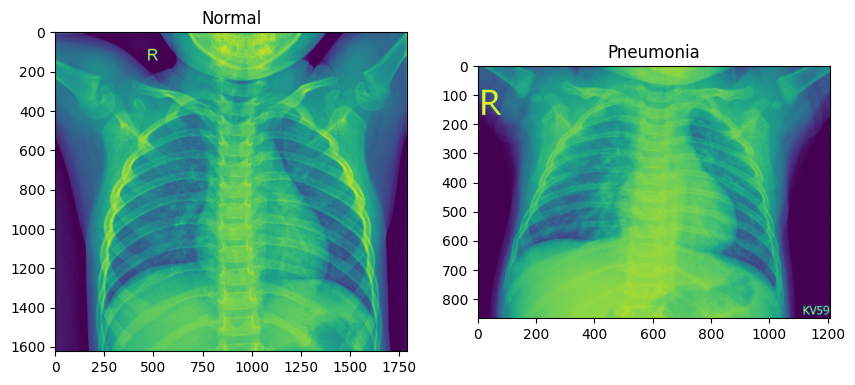

In [4]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [5]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as
# your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [6]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)
# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =
['accuracy'])

In [7]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
cnn_model = model_fin.fit(training_set, steps_per_epoch = 163, epochs = 10, validation_data = validation_generator, validation_steps = 624)

test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

max(y_pred)

Epoch 1/10


/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.6849 - loss: 1.1813 - val_accuracy: 0.6250 - val_loss: 0.6957
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6957
Epoch 3/10


2024-05-29 16:27:59.888916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-29 16:27:59.904721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:27:59.984022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8702 - loss: 0.3013 - val_accuracy: 0.8750 - val_loss: 0.4555
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4555
Epoch 5/10


2024-05-29 16:28:23.130817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:28:23.137971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:28:23.226787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.8760 - loss: 0.2870 - val_accuracy: 0.6250 - val_loss: 0.6391
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6391
Epoch 7/10


2024-05-29 16:28:45.984768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:28:45.990739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:28:46.065966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.8744 - loss: 0.2849 - val_accuracy: 0.6250 - val_loss: 0.8574
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8574
Epoch 9/10


2024-05-29 16:29:08.407963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:29:08.414103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:29:08.489970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.8851 - loss: 0.2700 - val_accuracy: 0.9375 - val_loss: 0.3863
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.3863


2024-05-29 16:29:30.809998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:29:30.816404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:29:30.896981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.3515    


2024-05-29 16:29:33.177565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 83.65384340286255 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


0